In [30]:
import pandas as pd

from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
import statsmodels.tsa.api as smt

Загружаем данные

In [5]:
sales_of_company_x = pd.read_csv("D:\\GitRepo\\Нетология\\Временные ряды\\1._Лекция\\Series\\monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("D:\\GitRepo\\Нетология\\Временные ряды\\1._Лекция\\Series\\monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("D:\\GitRepo\\Нетология\\Временные ряды\\1._Лекция\\Series\\international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("D:\\GitRepo\\Нетология\\Временные ряды\\1._Лекция\\Series\\mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("D:\\GitRepo\\Нетология\\Временные ряды\\1._Лекция\\Series\\weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("D:\\GitRepo\\Нетология\\Временные ряды\\1._Лекция\\Series\\daily-total-female-births-in-cal.csv")

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

Рисуем начальные ряды

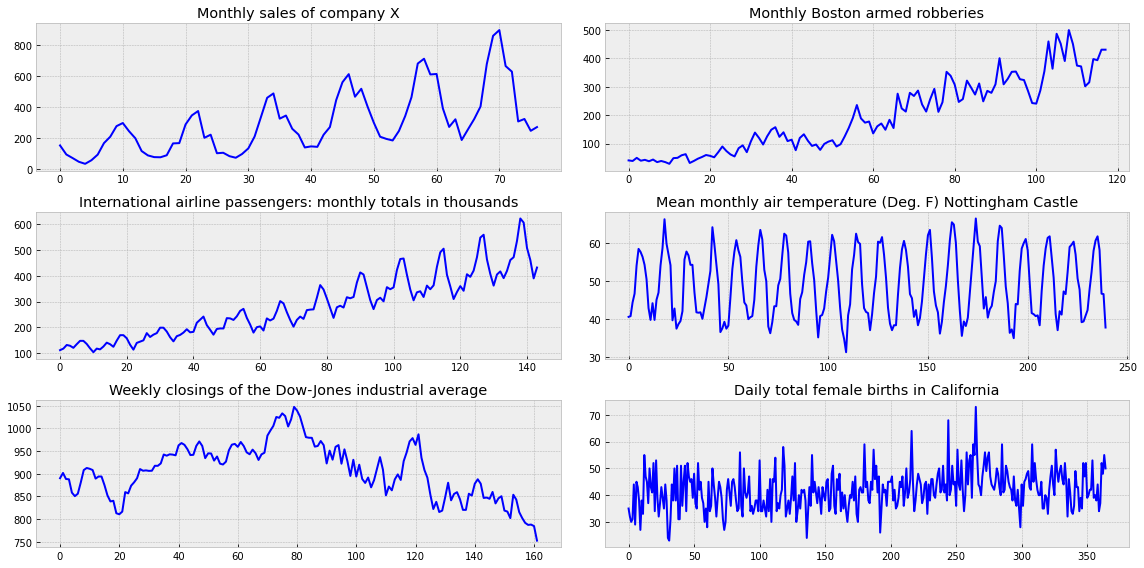

In [8]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Делаем преобразование бокса-кокса и рисуем что получилось

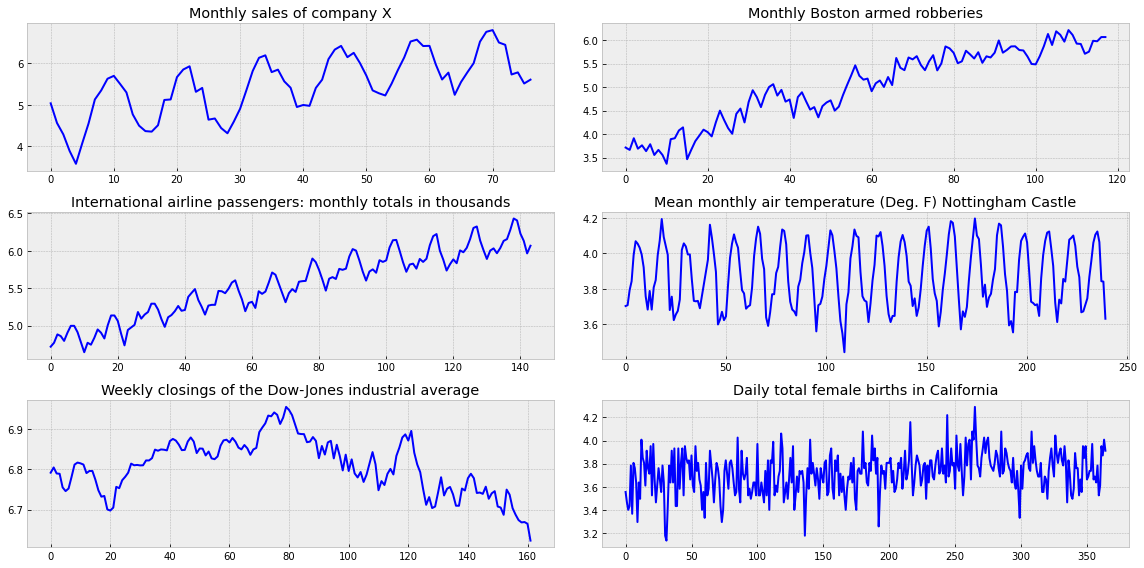

In [18]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        all_series[key] = boxcox(all_series[key], 0)
        ts_ax = plt.subplot2grid(layout, (y, x))
        plt.plot(all_series[key], color='blue')
        ts_ax.set_title(key)
    
    plt.tight_layout()

Проверяем какие ряды уже стационарны

In [24]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput['p-value'])

In [26]:
for key in all_series.keys():
    print('-----',key,':')
    test_stationarity(all_series[key])

----- Monthly sales of company X :
Results of Dickey-Fuller Test:
0.785310212484911
----- Monthly Boston armed robberies :
Results of Dickey-Fuller Test:
0.28083250354255296
----- International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
0.42236677477039436
----- Mean monthly air temperature (Deg. F) Nottingham Castle :
Results of Dickey-Fuller Test:
0.003332556252534763
----- Weekly closings of the Dow-Jones industrial average :
Results of Dickey-Fuller Test:
0.6691194827577271
----- Daily total female births in California :
Results of Dickey-Fuller Test:
0.00035889654490253665


Видно, что ряды Daily total female births in California и Mean monthly air temperature (Deg. F) Nottingham Castle уже стационарные. Дальнейшие преобразования для них делать не нужно:

In [29]:
series_for_diff = {
    "Monthly sales of company X": all_series["Monthly sales of company X"],
    "Monthly Boston armed robberies": all_series["Monthly Boston armed robberies"],
    "International airline passengers: monthly totals in thousands": all_series["International airline passengers: monthly totals in thousands"],
    "Weekly closings of the Dow-Jones industrial average": all_series["Weekly closings of the Dow-Jones industrial average"],
}

Рисуем коррелограммы:

In [42]:
def tsplot(y, name, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(name)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

D:\anaconda3\envs\WorkEnv\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


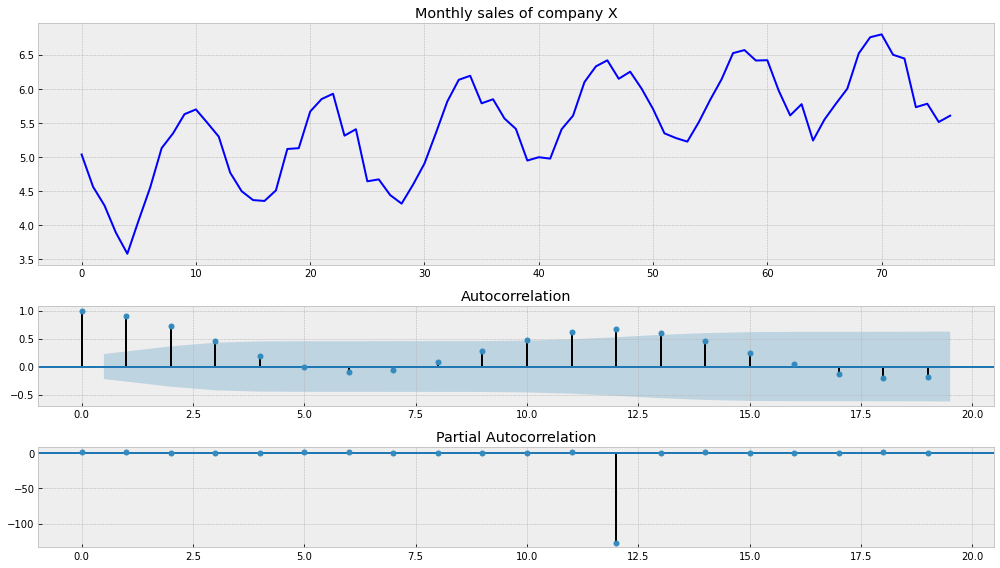

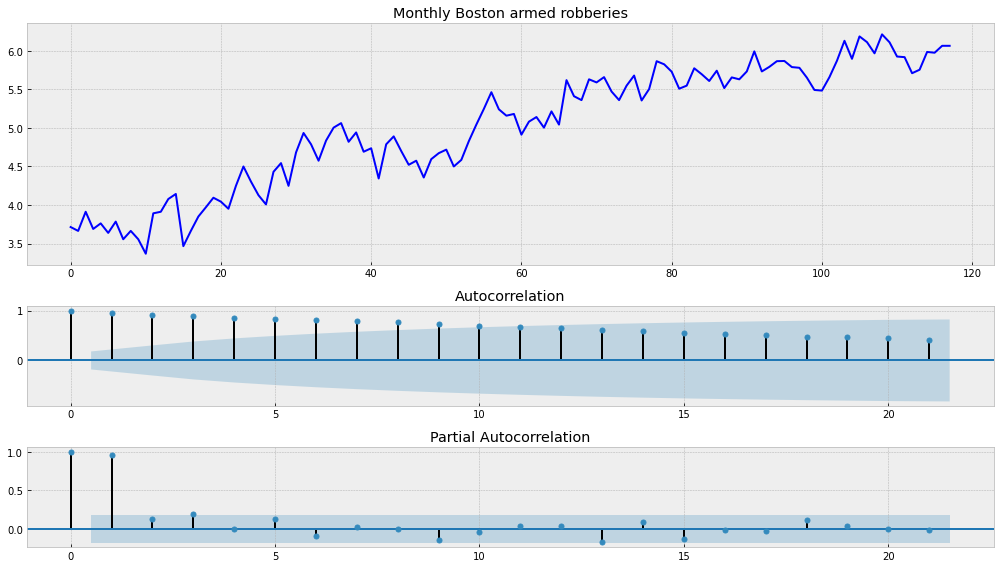

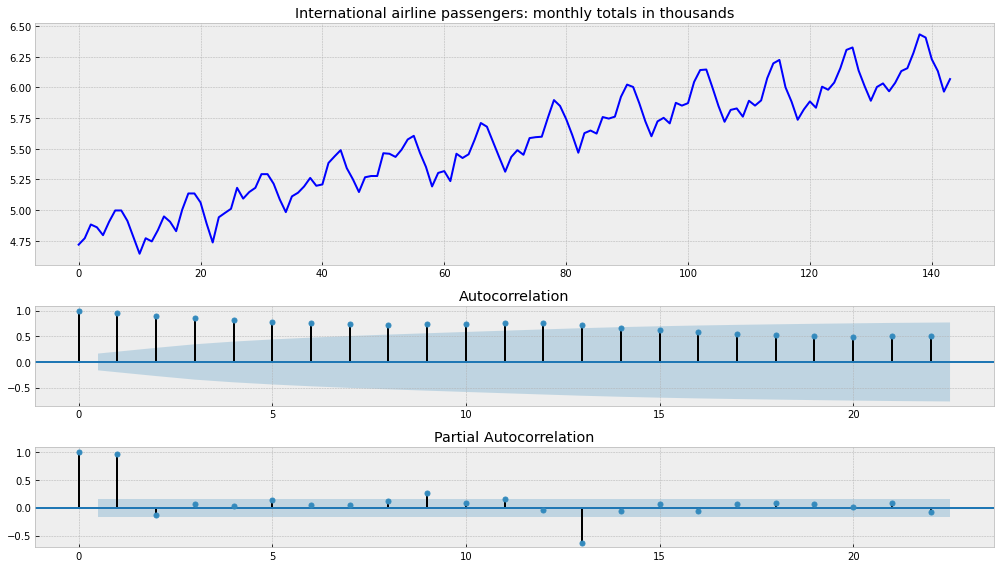

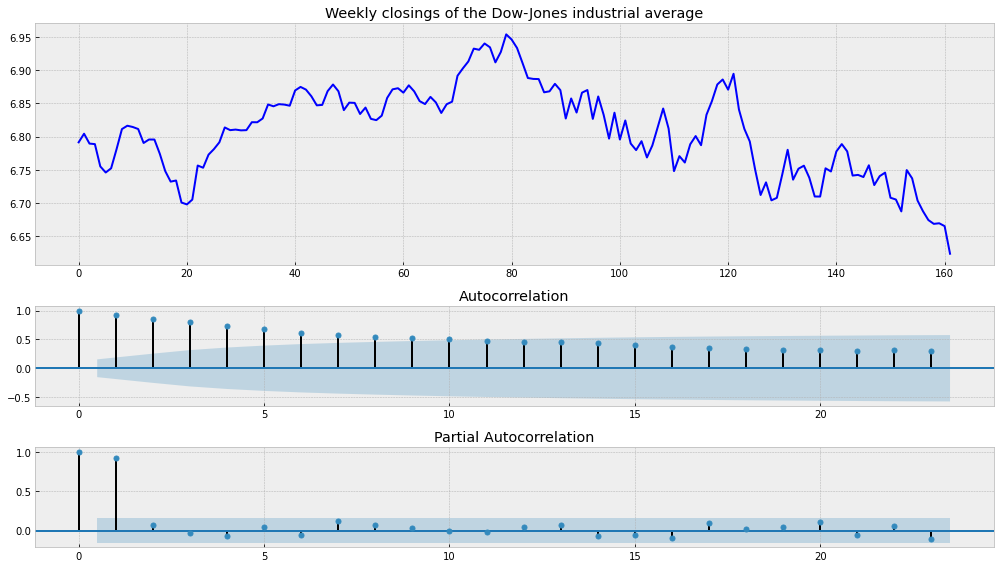

In [43]:
for key in series_for_diff.keys():
    tsplot(series_for_diff[key], key)

проведем дифференцирование этих рядов и нарисуем снова и проверим тестом дики-фулера:

In [44]:
for key in series_for_diff.keys():
    series_for_diff[key] = series_for_diff[key][1:] - series_for_diff[key][:-1]

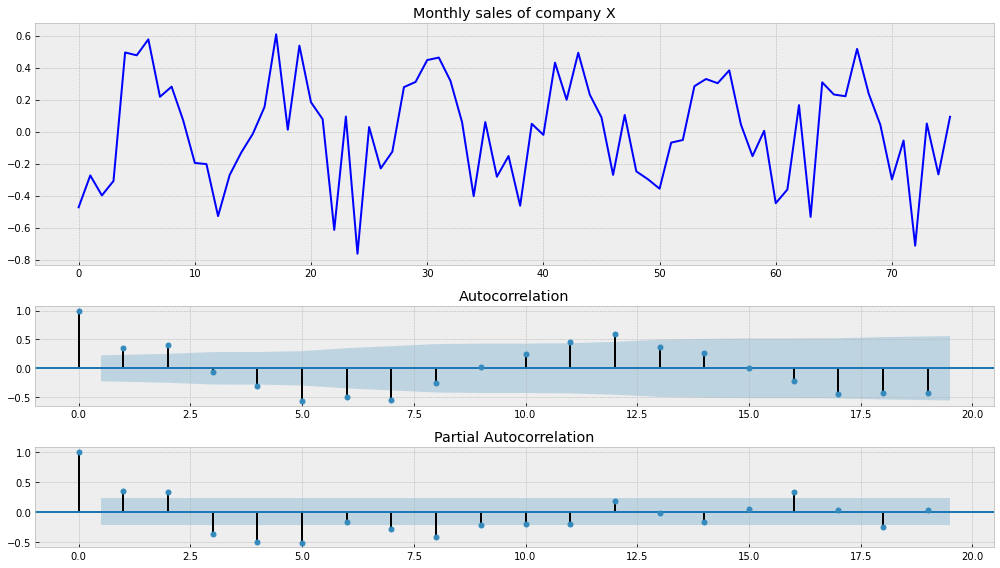

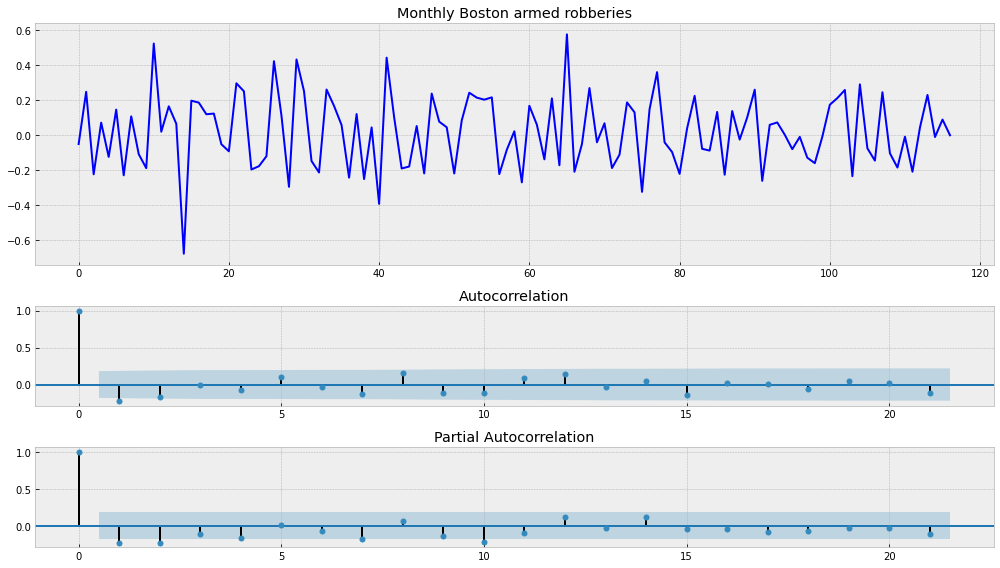

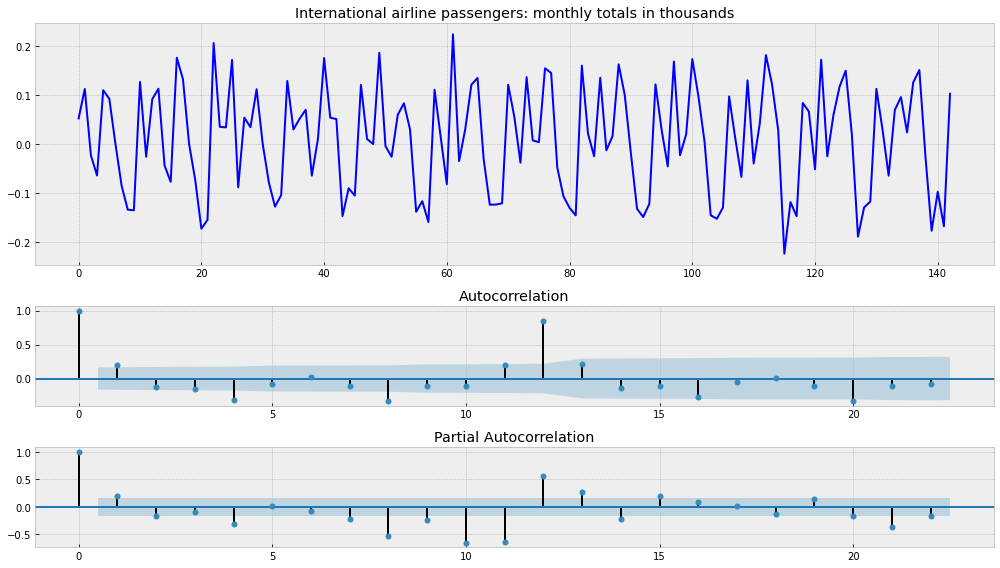

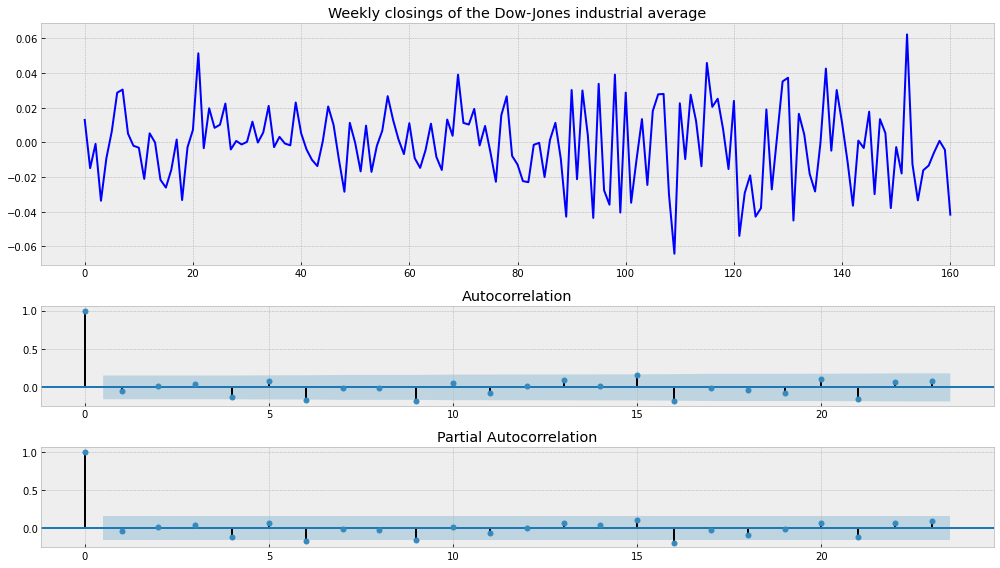

In [45]:
for key in series_for_diff.keys():
    tsplot(series_for_diff[key], key)

In [46]:
for key in series_for_diff.keys():
    print('-----',key,':')
    test_stationarity(series_for_diff[key])

----- Monthly sales of company X :
Results of Dickey-Fuller Test:
0.024025392839876092
----- Monthly Boston armed robberies :
Results of Dickey-Fuller Test:
2.3786024417438982e-11
----- International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
0.07112054815086596
----- Weekly closings of the Dow-Jones industrial average :
Results of Dickey-Fuller Test:
2.751609132291384e-24


Видим, что ряды Monthly sales of company X, Monthly Boston armed robberies и Weekly closings of the Dow-Jones industrial average уже достаточно стационарны, а в оставшемся нужно еще убрать сезонность. давайте сделаем это:

In [52]:
series_for_diff_season = {
    "International airline passengers: monthly totals in thousands": series_for_diff["International airline passengers: monthly totals in thousands"],
}

In [53]:
for key in series_for_diff_season.keys():
    series_for_diff_season[key] = series_for_diff_season[key][12:] - series_for_diff_season[key][:-12]

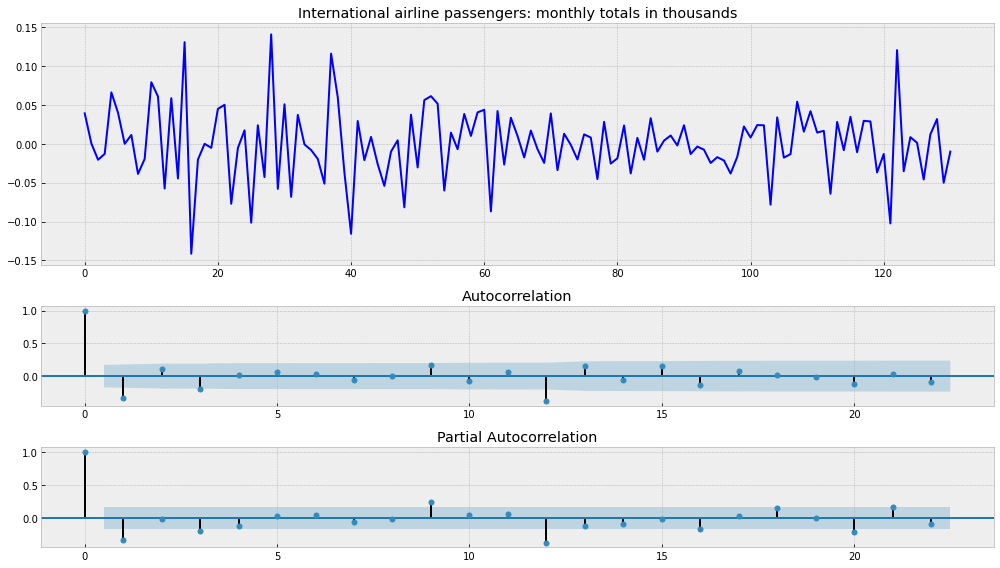

In [54]:
for key in series_for_diff_season.keys():
    tsplot(series_for_diff_season[key], key)

In [55]:
for key in series_for_diff_season.keys():
    print('-----',key,':')
    test_stationarity(series_for_diff_season[key])

----- International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
0.00024859123113839645


Теперь и этот ряд стационарен. 